In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from skimage import transform
import pandas as pd
import torchvision.datasets as dset
import torchvision.transforms as T
import pydicom
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook

In [2]:
from Pytorch_UNet.UNet_Loader import ILDDataset
lung_dataset = ILDDataset(cystic_path='/Users/magdy/Desktop/Stanford Spring/BMI260/Project/Data/cystic_dataset_masks/Train',
                          root_dir='/Users/magdy/Desktop/Stanford Spring/BMI260/Project/Data/Cystic Dataset/Train',
                          mask=True, HU=True, resize=256)

(256, 256)


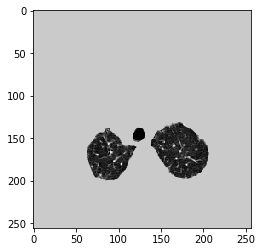

In [3]:
# print(lung_dataset.__len__())
sample = lung_dataset[170]
print(sample[0].shape)
plt.imshow(sample[0], cmap='gray')
plt.show()

(256, 256)


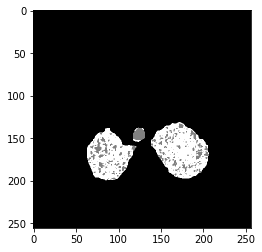

In [4]:
print(sample[1].shape)
plt.imshow(sample[1], cmap='gray')
plt.show()

In [5]:
#Get number of slices
cyst_dir = '/Users/magdy/Desktop/Stanford Spring/BMI260/Project/Data/cystic_dataset_masks/Test'

list_of_scans = os.listdir(cyst_dir)
print(list_of_scans)
num_scans = len(list_of_scans)

cntr = 0
for scan_num in range(num_scans):
    scan_path = os.path.join(cyst_dir, list_of_scans[scan_num])
#     print(scan_path)
    if (not os.path.isdir(scan_path)) or (list_of_scans[scan_num] == "HRCT_pilot"):
        continue
    list_of_slices = os.listdir(scan_path)
#     print(list_of_slices)
    num_slices = len(list_of_slices)
    for slice_num in range(num_slices):
        if (list_of_slices[slice_num][-4:] != ".png"):
            continue
        slice_path = os.path.join(scan_path,list_of_slices[slice_num])
#         print(slice_path)
        cntr += 1
        
print(cntr)

['168', '.DS_Store', '181', '175', '184', '177', '185']
162
